# Fashion MNIST dataset prediction
## This notebook will implement neural networks using numpy 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd

In [2]:
import time

In [3]:
from sklearn.utils import shuffle

# Dataset :- 
### 1. Training dataset which is loaded contains 60,000 samples with each sample being an fashion grey sacle image of (28 X 28 = 784) pixels. The first column tells the class to which the sample belongs and the remaining (28 X 28 = 784) columns give their respective pixel values. 
* Each row is a separate image
* Column 1 is the class label.
* Remaining columns are pixel numbers (784 total).
* Each value is the darkness of the pixel (1 to 255)

### 2. Test set contains 10,000 samples of similiar type with values in training set format.

### 3.  Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

### 4. Each training and test example is assigned to one of the following labels:


0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

### 5. This dataset is under MIT License (MIT) Copyright © [2017] 

HDF5 is a data model, library, and file format for storing and managing data.It supports an unlimited variety of datatypes, and is designed for flexible and efficient I/O and for high volume and complex data. HDF® supports n-dimensional datasets and each element in the dataset may itself be a complex object.

The h5py package is a Pythonic interface to the HDF5 binary data format.It lets you store huge amounts of numerical data, and easily manipulate that data from NumPy. For example, you can slice into multi-terabyte datasets stored on disk, as if they were real NumPy arrays. Thousands of datasets can be stored in a single file, categorized and tagged however you want.

H5py uses straightforward NumPy and Python metaphors, like dictionary and NumPy array syntax. For example, you can iterate over datasets in a file, or check out the .shape or .dtype attributes of datasets. You don't need to know anything special about HDF5 to get started.

In [4]:
plt.rcParams['image.cmap'] = "gray"

In [5]:
# Loading fashion-mnist trainig dataset(60,000 images) into data_train
data_train = pd.read_csv("fashion-mnist_train.csv")   

In [6]:
# Loading fashion-mnist test dataset(10,000 images) into data_test
data_test = pd.read_csv("fashion-mnist_test.csv")

In [7]:
# We have 785 columns with the first column stating the label(class) of the image and the rest 784 columns are the 
# pixel value's for that particular image
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


8

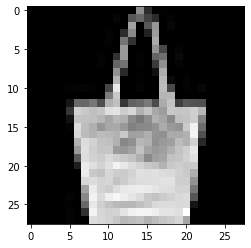

In [8]:
# Looking at the images of the training dataset
index = 9 # Looking at the 14th image
plt.imshow(np.array(data_train.iloc[index][1:]).reshape(28,28)); data_train.iloc[index][0] 

In [9]:
train_data_input = np.array(data_train)[:,1:].T

In [10]:
train_data_label = np.array(data_train)[:,0]

In [11]:
train_data_input, train_data_label = shuffle(np.transpose(train_data_input), train_data_label)

In [12]:
train_data_input = np.transpose(train_data_input)

In [13]:
test_data_input = np.array(data_test)[:,1:].T

In [14]:
test_data_label = np.array(data_test)[:,0]

In [15]:
test_data_input, test_data_label = shuffle(np.transpose(test_data_input), test_data_label)

In [16]:
test_data_input = np.transpose(test_data_input)

### We are making a neural network with 3 hidden layers with 16 nodes in each layer. Later we will modify the code in such a way that we can make a network with any number of layers and nodes according to the users input

Remember the following points :-

1) If we have ReLu or leaky_ReLu as the activation function for the last layer then we expect there to be only one node in the last layer which would output the prediction

2) If we have sigmoid or tanh as the activation function for the last layer then we expect there to be only one node in the last layer

3) If we have sigmoid as the activation function for the last layer then we expect there to be n_L number of  nodes in the last layer where n_L is the number of classes 

In [17]:
# nodes_layers is a list which stores the number of nodes in the various layers of the neuaral network 
nodes_layers = [train_data_input.shape[0], 16, 16, 16, len(np.unique(train_data_label))]

In [18]:
number_layers = len(nodes_layers) # Total number of layers in the neural network, including input,output and 
                                  # hidden layers

In [19]:
m = train_data_input.shape[1] # Number of examples fed into the neural network

In [20]:
# coeffecients is a dictionary to store all the coeffecients of a neural network
coeffecients = {}

In [21]:
# nodes is a dictionary which will store all the Z and the activations of all the layers
nodes = {"activation0" : train_data_input}

In [22]:
# List to store the activation functions applied after each layer
activations = ["relu", "relu", "relu", "softmax"]

In [23]:
'''This function will shuffle the data and return it
    
       Arguments - train_data_input - input data
                 - train_data_label - output data
                 - shuffle - weather we want to shuffle the data
                 
       Return - train_data_input - input data
              - train_data_label - output data'''
    
def shuffle(train_data_input, train_data_label, shuffle):

    if (shuffle == True):
        train_data_input, train_data_label = shuffle(np.transpose(train_data_input), train_data_label)
        train_data_input = np.transpose(train_data_input)

    return train_data_input, train_data_label

In [24]:
shuffle(train_data_input, train_data_label, shuffle)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 3, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([7, 2, 7, ..., 0, 3, 5]))

In [25]:
'''This function checks if the number of nodes in the last layer is in accordance with the activation function of 
       last layer

       Arguments - activation - activation function of the last layer
                 - node - number of nodes in the last layer
                 - len_train_data_label - the number of classes'''
    
def check_activation (activation, node, len_train_data_label = None):

    if (activation == "relu"):
        assert node == 1, "As the activation function in the last layer is ReLu, there should be only node in the last layer"

    elif (activation == "leaky_relu"):
        assert node == 1, "As the activation function in the last layer is Leaky ReLu, there should be only node in the last layer"

    elif (activation == "sigmoid"):
        assert node == 1, "As the activation function in the last layer is sigmoid, there should be only node in the last layer"

    elif (activation == "tanh"):
        assert node == 1, "As the activation function in the last layer is tanh, there should be only node in the last layer"

    elif (activation == "softmax"):
        assert node == len_train_data_label, "As the activation function in the last layer is softmax, the number of nodes in the last layer should be equal to the number of classes"

In [26]:
# check_activation("sigmoid", 3, len(np.unique(train_data_label))-1)
# This shows error - As the activation function in the last layer is sigmoid, there should be only node in the last layer

In [27]:
'''This function will initialize the coeffecients for a single layer.

   Arguments - coeffecients - a dictionary to store all the coeffecients of a neural network
               n_prev_layer - number of nodes in the previous layer
               n_current_layer - number of nodes in current layer
               layer_number - The numberth of the this layer in the neural network

   Return - coeffecients - updated dictionary with initialized coeffecients for that layer'''

def initialize_coeffecients_single_layer(coeffecients, n_prev_layer, n_current_layer, layer_number):

    coeffecients["W" + str(layer_number)] = np.random.randn(n_current_layer, n_prev_layer) * 0.01
    coeffecients["b" + str(layer_number)] = np.zeros(shape = (n_current_layer, 1))

    return coeffecients

In [28]:
'''This function will initialize all the coeffecients in the neural network.

    Arguments - nodes_layer - list containing the number of nodes in the various layers of the neuaral network
                coeffecients - a dictionary to store all the coeffecients of a neural network
                number_layers - total number of layers in the neural network, including input,output and 
                                   hidden layers

    Return - coeffecients - all coeffecients after being initialized'''
        
def initialize_coeffecients(nodes_layers, coeffecients, number_layers):

    for i in range(1, number_layers):
        coeffecients = initialize_coeffecients_single_layer(coeffecients = coeffecients,
                                                            n_prev_layer = nodes_layers[i-1],
                                                            n_current_layer = nodes_layers[i],
                                                            layer_number = i)

    return coeffecients

In [79]:
initialize_coeffecients(nodes_layers = nodes_layers, coeffecients = coeffecients, number_layers = number_layers)

{'W1': array([[-0.02488606, -0.00559949,  0.00431064, ..., -0.00175817,
         -0.00671286,  0.01268634],
        [-0.00066804,  0.01016927,  0.01543503, ..., -0.00229575,
          0.00729999, -0.00413168],
        [-0.0192986 , -0.00152966, -0.0145276 , ...,  0.00389626,
         -0.03345396,  0.00896178],
        ...,
        [-0.00427638,  0.00982294,  0.00519714, ...,  0.00100679,
          0.0019148 ,  0.01013062],
        [-0.01101631, -0.01591572, -0.0086841 , ..., -0.01256107,
         -0.00832112, -0.00525772],
        [-0.00325458,  0.0241598 ,  0.00231352, ...,  0.01077346,
          0.00630213, -0.00565457]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 0.0034004 , -0.00309776, -0.01196575, -0.01081916,  0.00245322,
         -0.00126451,  0.0108356 , -0.0042976 , -0.0012

In [30]:
'''This function will undertake forward propogation for a single layer.Thus calculating Z[L] and A[L] for 
       that layer.

       Arguments - coeffecients - Dictionary storing the coeffecients of all the layers
                   nodes - Dictionary storing the inputs, Z and activations of all layers
                   activation - The activation function to be applied in this particular layer
                   layer_number - The numberth of the this layer in the neural network

       Return - coeffecients_b - Dictionary containing the (coeffecients W of this layer) and (coeffecient b of this 
                                 layer)
              - nodes - Dictionary updated with the Z and activation of this layer'''
        
def forward_propogation_single_layer(coeffecients, nodes, activation, layer_number):

    W = coeffecients["W" + str(layer_number)]
    b = coeffecients["b" + str(layer_number)]
    A_prev = nodes["activation" + str(layer_number - 1)]

    Z_current = np.dot(W, A_prev) + b


    if(activation == "sigmoid"):
        A_current = np.divide(1, 1 + np.exp(-Z_current))

    elif(activation == "relu"):
        A_current = np.maximum(0, Z_current)

    elif(activation == "tanh"):
        A_current = np.divide(np.sum(np.exp(Z_current), -np.exp(-Z_current)),
                              np.sum(np.exp(Z_current), np.exp(-Z_current)))

    elif(activation == "leaky_relu"):
        A_current = np.maximum(np.multiply(0.01, Z_current), Z_current)

    elif(activation == "softmax"):
        sum_exp = np.sum(np.exp(Z_current), axis = 0)
        A_current = np.exp(Z_current)/ sum_exp 


    nodes["Z" + str(layer_number)] = Z_current
    nodes["activation" + str(layer_number)] = A_current

    return nodes

In [31]:
'''This function will undertake forward propogation for all the layers of the neural network.Thus calculating 
       Z[L] and A[L] for all layers.

       Arguments - coeffecients - Dictionary storing the coeffecients of all the layers
                   nodes - Dictionary storing the Inputs, activations and Z of all the layers
                   activations - List containing the activation functions applied after each layer
                   number_layers - total number of layers in the neural network, including input,output and 
                                   hidden layers

       Return - cache - Dictionary containing the activations, Z and W of all layers
              - nodes - Dictionary updated with the activations of all layers'''
    
def forward_propogation(coeffecients, nodes, activations, number_layers):

    for i in range(1, number_layers):
        nodes = forward_propogation_single_layer(coeffecients, nodes, activations[i-1], i)

    return nodes

In [32]:
nodes = forward_propogation(coeffecients = coeffecients, nodes = nodes, activations = activations, number_layers = number_layers)

In [78]:
nodes

{'activation0': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 4.61361015e-05, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 'Z1': array([[ 1.72491557e-05, -5.22091409e-04, -1.29101057e-04, ...,
         -4.00793367e-04, -1.56993573e-04, -6.66262106e-04],
        [-1.43451784e-04,  1.22424755e-03,  2.41801152e-04, ...,
          7.03489923e-04,  2.31188198e-04,  5.1065930

In [34]:
for i in range(1, 5):
    print(coeffecients["W" + str(i)].shape)
    print(coeffecients["b" + str(i)].shape)

(16, 784)
(16, 1)
(16, 16)
(16, 1)
(16, 16)
(16, 1)
(10, 16)
(10, 1)


In [35]:
'''This function will convert the labels for training images in the form that we require for training if the 
    last activation is softmax activation function.
    We are converting labels into an array which could be used to train the function.
    For example let's say that the label of a particular example is '2' then we will convert 
    it to - [0,0,1,0,0,0,0,0,0,0]'''
    
def label_softmax(activations, train_data_label):

    if(activations[number_layers - 2] == "softmax"):

        labels_softmax_tr = [] # This is the list which will be used for training of the neural network

        labels_tr = train_data_label.copy()

        for i in range(0, len(labels_tr)): # Iterating through all the labels
            labels_tr[i] = labels_tr[i] * 10**(9-labels_tr[i])
            labels_softmax_tr.append([int(d) for d in str(labels_tr[i])])
            for j in range(0, 10 - len(labels_softmax_tr[i])):
                labels_softmax_tr[i].insert(0,0)

        labels_softmax_tr = np.floor((np.array(labels_softmax_tr) / 10) + 0.9).T

        return labels_softmax_tr

    else:

        return 0

In [36]:
label_softmax(activations, train_data_label)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
'''This function would return the cost after a particular iteration.

   Arguments - predictions - Activations of the final layer of neural network/output that our network has generated
               labels - The actual result that should have been our output if our network would have predicted 
                        accurately
               activation - The activation function applied on the final layer
               m - Number of training examples fed into the network

   Return - j - The cost function which tells us how inaccurate were the predictions of our neural network.'''

def cost_function(predictions, labels, activation, m):

    if(activation == "sigmoid"):
        j = (-1 / m) * np.sum(np.multiply(labels, np.log(predictions)) + np.multiply(1 - labels, np.log(1 - predictions)))   

    elif(activation == "softmax"):
        j = (-1 / m) * np.sum(np.multiply(labels, np.log(predictions)))

    elif(activation == "tanh"):
        j = (-1 / m) * np.sum(np.multiply((labels+1)/2, np.log((predictions+1)/2)) + np.multiply((1 - labels)/2, np.log((1 - predictions)/2)))

    elif(activation == "relu"):
        j = (1 / m) * (np.sum(np.square(np.diff(predictions, labels)))) * (1 / len(predictions))


    np.squeeze(j) # This would squeeze the cost to a single value without dimensions. Example from [[25]] to 25
    return j
    

In [38]:
cost_function(predictions = nodes["activation" + str(number_layers -1)],
              labels = label_softmax(activations, train_data_label),
              activation = activations[number_layers - 2], 
              m = m)

2.072250835914842

In [39]:
'''dZ represents d(cost_function) / d(Z)
   dW represents d(cost_function) / d(W)
   db represents d(cost_function) / d(b)
   dA represents d(cost_function) / d(A)
   Thus dx where x be any variable represents d(cost_function) / d(x)
   This function will calculate dZ, dW and db of the last layer, dA of second last layer and update the values of
   W_current and b_current.

   Arguments - nodes - Dictionary storing the Inputs, activations and Z of all the layers
               labels - The actual result that should have been our output if our network would have predicted 
                        accurately
               coeffecients - Dictionary storing the coeffecients of all the layers   
               activation - The activation function applied on the final layer
               number_layers - The total number of layers in the neural network including inputs,hidden layers 
                               and outputs
               m - Number of training examples fed into the network
               learning_rate - The rate proportional to which we update the values of our coeffecients

   Return - coeffecients - Dictionary storing the coeffecients of all the layers
            dA_prev - d(cost_function) / d(A_prev)'''

def back_propogation_last_layer(nodes, labels, coeffecients, activation, number_layers, m, learning_rate = 0.001):

    # Assigning values:-

    predictions = nodes["activation" + str(number_layers - 1)]
    W_current = coeffecients["W" + str(number_layers - 1)] 
    b_current = coeffecients["b" + str(number_layers - 1)] 
    Z_current = nodes["Z" + str(number_layers - 1)]
    A_prev = nodes["activation" + str(number_layers - 2)]

    # Calculating dZ:-

    if(activation == "sigmoid" or activation == "softmax"):
        dZ = predictions - labels

    elif(activation == "tanh"):
        dZ = (predictions - labels) * (1 - np.square(Z_current)) / (1 - np.square(predictions))

    elif(activation == "relu"):
         dZ = 2 * (predictions - labels) * np.where(Z_current > 0, 1, 0)

    elif(activation == "leaky_relu"):
         dZ = 2 * (predictions - labels) * np.where(Z_current > 0, 1, 0.01)

    # Calculating dW, db and dA_prev 

    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m) * np.sum(dZ, axis = 1, keepdims = True) # ndims - True, so that the number of dimensions of the 
                                                         # array after the summation is equal to the dimensions of
                                                         # array before the array.
    dA_prev = np.dot(W_current.T, dZ)

    # Updating coeffecients :-

    W_current = W_current - (learning_rate * dW)
    b_current = b_current - (learning_rate * db) 

    coeffecients.update({"W" + str(number_layers - 1) : W_current, "b" + str(number_layers - 1) : b_current})

    return dA_prev, coeffecients

In [40]:
dA_prev, coeffecients = back_propogation_last_layer(nodes = nodes, 
                            labels = label_softmax(activations, train_data_label),
                            coeffecients = coeffecients,
                            activation = activations[number_layers -2],
                            number_layers = number_layers,
                            m = m,
                            learning_rate = 0.001)

In [41]:
dA_prev

array([[ 0.01429154, -0.00885136,  0.01429169, ..., -0.00334614,
        -0.0178945 , -0.00617592],
       [-0.00282928, -0.00832352, -0.00282918, ...,  0.0007417 ,
         0.00413619,  0.01074885],
       [ 0.00238039,  0.0103748 ,  0.00238123, ..., -0.00500919,
        -0.00526972, -0.00348232],
       ...,
       [-0.00057753, -0.01041474, -0.00057763, ...,  0.00088411,
         0.00082545,  0.00350484],
       [ 0.01228108, -0.00806438,  0.01228121, ..., -0.0011635 ,
        -0.01577646,  0.0048185 ],
       [ 0.00797102, -0.00662799,  0.00797192, ..., -0.00096275,
         0.00278773, -0.01077609]])

In [42]:
coeffecients

{'W1': array([[-0.00423179,  0.00020704, -0.00541407, ...,  0.00051929,
         -0.00071346,  0.00356424],
        [ 0.00810601, -0.00047524, -0.00821461, ..., -0.0142731 ,
          0.0058031 ,  0.00288387],
        [ 0.0072132 , -0.00216137,  0.01321626, ..., -0.01395527,
          0.01122818,  0.0083662 ],
        ...,
        [ 0.00489796,  0.00020761,  0.00459259, ...,  0.0082479 ,
         -0.00310586,  0.00840404],
        [-0.01844786,  0.005453  ,  0.00962235, ..., -0.00642928,
          0.00478975, -0.00086448],
        [ 0.00586146,  0.00978817, -0.00456872, ...,  0.00338529,
         -0.0136026 , -0.0106885 ]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 6.50512973e-03,  6.30803042e-03, -2.08425211e-02,
         -3.64577524e-03, -1.64260108e-03,  3.06119559e-03,
         

In [43]:
'''dx where x be any variable represents d(cost_function) / d(x)
   This function will calculate dZ, dW and db of the current layer, dA of previous layer and update 
   the values of W_current and b_current.

   Arguments - nodes - Dictionary storing the Inputs, activations and Z of all the layers
               coeffecients - Dictionary storing the coeffecients of all the layers
               dA - d(cost_function) / d(A_current) 
               activation - The activation function applied on the this layer
               layer_number - The numberth of the this layer in the neural network
               m - Number of training examples fed into the network
               learning_rate - The rate proportional to which we update the values of our coeffecients

   Return - coeffecients - Dictionary storing the coeffecients of all the layers
            dA_prev - d(cost_function) / d(A_prev)'''

def back_propogation_single_layer(nodes, coeffecients, dA, activation, layer_number, m, learning_rate = 0.001):

    # Assigning values:-

    W_current = coeffecients["W" + str(layer_number)] 
    b_current = coeffecients["b" + str(layer_number)]
    A_current = nodes["activation" + str(layer_number)]
    Z_current = nodes["Z" + str(layer_number)]
    A_prev = nodes["activation" + str(layer_number - 1)]

    # Calculating dZ:-

    if(activation == "sigmoid"):
        dZ = dA * A_current * (1 - A_current)

    elif(activation == "tanh"):
        dZ = dA * (1 - np.square(A_current))

    elif(activation == "relu"):
        dZ = dA * np.where(Z_current > 0, 1, 0)

    elif(activation == "leaky_relu"):
        dZ = dA * np.where(Z_current > 0, 1, 0.01)

    # Calculating dW, db and dA_prev 

    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m) * np.sum(dZ, axis = 1, keepdims = True) # ndims - True, so that the number of dimensions of the 
                                                         # array after the summation is equal to the dimensions of
                                                         # array before the array.
    dA_prev = np.dot(W_current.T, dZ)

    # updating coeffecients :-

    W_current = W_current - (learning_rate * dW)
    b_current = b_current - (learning_rate * db)

    coeffecients.update({"W" + str(layer_number) : W_current, "b" + str(layer_number) : b_current})

    return dA_prev, coeffecients 

In [44]:
back_propogation_single_layer(nodes = nodes,
                              coeffecients = coeffecients,
                              dA = dA_prev,
                              activation = activations[2],
                              layer_number = 3,
                              m = m,
                              learning_rate = 0.001)

(array([[-1.73385396e-04,  3.68797927e-04, -4.23132815e-05, ...,
         -1.88623782e-04,  2.94604178e-04,  3.56527650e-05],
        [-3.57645144e-04,  2.22398210e-04, -2.11108134e-04, ...,
          1.05236881e-04,  4.09726839e-04,  1.16454994e-05],
        [ 1.43610625e-04, -4.52427649e-04, -1.39452867e-05, ...,
          9.47547801e-05,  1.70843750e-04, -3.64405626e-05],
        ...,
        [ 4.03171307e-05,  1.29187491e-04,  1.90483892e-04, ...,
         -7.90928603e-06,  1.92078122e-04, -3.52379939e-04],
        [ 1.99369518e-04,  1.82615653e-04,  6.51028084e-05, ...,
         -2.12714130e-04, -3.08278970e-04, -1.74942469e-04],
        [-2.74698458e-04, -1.65486626e-04, -3.42758281e-04, ...,
          1.24173069e-05,  4.11621316e-05,  1.83963683e-04]]),
 {'W1': array([[-0.00423179,  0.00020704, -0.00541407, ...,  0.00051929,
          -0.00071346,  0.00356424],
         [ 0.00810601, -0.00047524, -0.00821461, ..., -0.0142731 ,
           0.0058031 ,  0.00288387],
         [ 0.00

In [45]:
'''dx where x be any variable represents d(cost_function) / d(x)
   This function will undertake back propogation thus updating the values of coeffecients based on the value
   of calculated dW and db

   Arguments - nodes - Dictionary storing the Inputs, activations and Z of all the layers
               labels - The actual result that should have been our output if our network would have predicted 
                        accurately
               coeffecients - Dictionary storing the coeffecients of all the layers 
               activations - List containing the activation functions applied after each layer
               number_layers - The total number of layers in the neural network including inputs,hidden layers 
                               and outputs
               m - Number of training examples fed into the network
               learning_rate - The rate proportional to which we update the values of our coeffecients

   Return - coeffecients - Dictionary storing the coeffecients of all the layers'''

def back_propogation (nodes, labels, coeffecients, activations, number_layers, m, learning_rate = 0.001):

    dA_prev, coeffecients = back_propogation_last_layer(nodes = nodes, 
                            labels = labels,
                            coeffecients = coeffecients,
                            activation = activations[-1],
                            number_layers = number_layers,
                            m = m,
                            learning_rate = 0.001)

    for i in range(number_layers - 2, 0, -1):
        dA_prev, coeffecients = back_propogation_single_layer(nodes = nodes,
                              coeffecients = coeffecients,
                              dA = dA_prev,
                              activation = activations[i-1],
                              layer_number = i,
                              m = m,
                              learning_rate = 0.001)

    return coeffecients


In [46]:
back_propogation (nodes, label_softmax(activations, train_data_label), coeffecients, activations, number_layers, m, learning_rate = 0.001)

{'W1': array([[-0.00423179,  0.00020704, -0.00541407, ...,  0.00051929,
         -0.00071346,  0.00356424],
        [ 0.00810601, -0.00047524, -0.00821461, ..., -0.01427309,
          0.0058031 ,  0.00288387],
        [ 0.0072132 , -0.00216137,  0.01321626, ..., -0.01395527,
          0.01122818,  0.0083662 ],
        ...,
        [ 0.00489796,  0.00020761,  0.00459259, ...,  0.0082479 ,
         -0.00310586,  0.00840404],
        [-0.01844786,  0.005453  ,  0.00962235, ..., -0.00642928,
          0.00478975, -0.00086448],
        [ 0.00586146,  0.00978817, -0.00456872, ...,  0.00338529,
         -0.0136026 , -0.0106885 ]]),
 'b1': array([[ 5.44777760e-10],
        [ 6.17435611e-10],
        [ 2.22972232e-12],
        [-6.10381385e-10],
        [ 9.21701028e-11],
        [-3.54482010e-10],
        [ 4.42642834e-10],
        [-7.57765970e-10],
        [ 1.06090822e-09],
        [ 8.63333532e-10],
        [-3.65303276e-10],
        [-1.84986203e-10],
        [-1.31300502e-09],
        [ 

In [47]:
'''Now putting it all together!!!!'''

def train (train_data_input, train_data_label, nodes, labels, coeffecients, activations, nodes_layers,
           number_layers, m, iterations, learning_rate = 0.001):

    train_data_input, train_data_label = shuffle (train_data_input, train_data_label, shuffle)

    check_activation(activations[-1], nodes_layers[-1], len_train_data_label = len(np.unique(train_data_label)))

    coeffecients = initialize_coeffecients(nodes_layers = nodes_layers, coeffecients = coeffecients, number_layers = number_layers)

    train_data_label = label_softmax(activations, train_data_label)

    costs = []

    for k in range(0, iterations):

        nodes = forward_propogation(coeffecients = coeffecients, nodes = nodes, activations = activations, number_layers = number_layers)

        j = cost_function(predictions = nodes["activation" + str(number_layers - 1)], labels = train_data_label, activation = activations[number_layers - 2], m = m)

        if(k % 100 == 0):
            print(j)
            costs.append(j)
        # nodes, labels, coeffecients, activation, number_layers, m, learning_rate = 0.001
        coeffecients = back_propogation (nodes = nodes, labels = train_data_label, 
                                         coeffecients = coeffecients, activations =  activations,
                                         number_layers = number_layers, m = m,
                                         learning_rate = 0.001)

    return nodes, coeffecients, costs

In [54]:
def create_neural_network (train_data_input, train_data_label, iterations, learning_rate, shuffle = True):
    # nodes_layers is a list which stores the number of nodes in the various layers of the neuaral network 
    nodes_layers = [train_data_input.shape[0], 16, 16, 16, len(np.unique(train_data_label))]
    
    # Total number of layers in the neural network, including input, output and hidden layers
    number_layers = len(nodes_layers)
    
    # Number of examples fed into the neural network
    m = train_data_input.shape[1]

    # coeffecients is a dictionary to store all the coeffecients of a neural network
    coeffecients = {}
    
    # nodes is a dictionary which will store all the Z and the activations of all the layers
    nodes = {"activation0" : train_data_input}
    
    # List to store the activation functions applied after each layer
    activations = ["relu", "relu", "relu", "softmax"]
    
    
    '''This function will shuffle the data and return it
    
       Arguments - train_data_input - input data
                 - train_data_label - output data
                 - shuffle - weather we want to shuffle the data
                 
       Return - train_data_input - input data
              - train_data_label - output data'''
    
    def shuffle(train_data_input, train_data_label, shuffle):
        
        if (shuffle == True):
            train_data_input, train_data_label = shuffle(np.transpose(train_data_input), train_data_label)
            train_data_input = np.transpose(train_data_input)

        return train_data_input, train_data_label
    
    
    '''This function checks if the number of nodes in the last layer is in accordance with the activation function of 
       last layer

       Arguments - activation - activation function of the last layer
                 - node - number of nodes in the last layer
                 - len_train_data_label - the number of classes'''
    
    def check_activation (activation, node, len_train_data_label = None):
        
        if (activation == "relu"):
            assert node == 1, "As the activation function in the last layer is ReLu, there should be only node in the last layer"

        elif (activation == "leaky_relu"):
            assert node == 1, "As the activation function in the last layer is Leaky ReLu, there should be only node in the last layer"

        elif (activation == "sigmoid"):
            assert node == 1, "As the activation function in the last layer is sigmoid, there should be only node in the last layer"

        elif (activation == "tanh"):
            assert node == 1, "As the activation function in the last layer is tanh, there should be only node in the last layer"

        elif (activation == "softmax"):
            assert node == len_train_data_label, "As the activation function in the last layer is softmax, the number of nodes in the last layer should be equal to the number of classes"
    
    
    
    '''This function will initialize the coeffecients for a single layer.

       Arguments - coeffecients - a dictionary to store all the coeffecients of a neural network
                   n_prev_layer - number of nodes in the previous layer
                   n_current_layer - number of nodes in current layer
                   layer_number - The numberth of the this layer in the neural network

       Return - coeffecients - updated dictionary with initialized coeffecients for that layer'''
        
    def initialize_coeffecients_single_layer(coeffecients, n_prev_layer, n_current_layer, layer_number):
        
        coeffecients["W" + str(layer_number)] = np.random.randn(n_current_layer, n_prev_layer) * 0.01
        coeffecients["b" + str(layer_number)] = np.zeros(shape = (n_current_layer, 1))
        
        return coeffecients
    
    
    '''This function will initialize all the coeffecients in the neural network.

        Arguments - nodes_layer - list containing the number of nodes in the various layers of the neuaral network
                    coeffecients - a dictionary to store all the coeffecients of a neural network
                    number_layers - total number of layers in the neural network, including input,output and 
                                       hidden layers

        Return - coeffecients - all coeffecients after being initialized'''
        
   
    def initialize_coeffecients(nodes_layers, coeffecients, number_layers):
        
        for i in range(1, number_layers):
            coeffecients = initialize_coeffecients_single_layer(coeffecients = coeffecients,
                                                                n_prev_layer = nodes_layers[i-1],
                                                                n_current_layer = nodes_layers[i],
                                                                layer_number = i)
        
        return coeffecients
        
        
    '''This function will undertake forward propogation for a single layer.Thus calculating Z[L] and A[L] for 
       that layer.

       Arguments - coeffecients - Dictionary storing the coeffecients of all the layers
                   nodes - Dictionary storing the inputs, Z and activations of all layers
                   activation - The activation function to be applied in this particular layer
                   layer_number - The numberth of the this layer in the neural network

       Return - coeffecients_b - Dictionary containing the (coeffecients W of this layer) and (coeffecient b of this 
                                 layer)
              - nodes - Dictionary updated with the Z and activation of this layer'''
        
    def forward_propogation_single_layer(coeffecients, nodes, activation, layer_number):
        
        W = coeffecients["W" + str(layer_number)]
        b = coeffecients["b" + str(layer_number)]
        A_prev = nodes["activation" + str(layer_number - 1)]

        Z_current = np.dot(W, A_prev) + b


        if(activation == "sigmoid"):
            A_current = np.divide(1, 1 + np.exp(-Z_current))

        elif(activation == "relu"):
            A_current = np.maximum(0, Z_current)

        elif(activation == "tanh"):
            A_current = np.divide(np.sum(np.exp(Z_current), -np.exp(-Z_current)),
                                  np.sum(np.exp(Z_current), np.exp(-Z_current)))

        elif(activation == "leaky_relu"):
            A_current = np.maximum(np.multiply(0.01, Z_current), Z_current)

        elif(activation == "softmax"):
            sum_exp = np.sum(np.exp(Z_current), axis = 0)
            A_current = np.exp(Z_current)/ sum_exp 
            

        nodes["Z" + str(layer_number)] = Z_current
        nodes["activation" + str(layer_number)] = A_current

        return nodes
    
            
    '''This function will undertake forward propogation for all the layers of the neural network.Thus calculating 
       Z[L] and A[L] for all layers.

       Arguments - coeffecients - Dictionary storing the coeffecients of all the layers
                   nodes - Dictionary storing the Inputs, activations and Z of all the layers
                   activations - List containing the activation functions applied after each layer
                   number_layers - total number of layers in the neural network, including input,output and 
                                   hidden layers

       Return - cache - Dictionary containing the activations, Z and W of all layers
              - nodes - Dictionary updated with the activations of all layers'''
    
    def forward_propogation(coeffecients, nodes, activations, number_layers):
        
        for i in range(1, number_layers):
            nodes = forward_propogation_single_layer(coeffecients, nodes, activations[i-1], i)
            
        return nodes
    

    '''This function will convert the labels for training images in the form that we require for training if the 
        last activation is softmax activation function.
        We are converting labels into an array which could be used to train the function.
        For example let's say that the label of a particular example is '2' then we will convert 
        it to - [0,0,1,0,0,0,0,0,0,0]'''
    
    def label_softmax(activations, train_data_label):
        
        if(activations[number_layers - 2] == "softmax"):

            labels_softmax_tr = [] # This is the list which will be used for training of the neural network

            labels_tr = train_data_label.copy()

            for i in range(0, len(labels_tr)): # Iterating through all the labels
                labels_tr[i] = labels_tr[i] * 10**(9-labels_tr[i])
                labels_softmax_tr.append([int(d) for d in str(labels_tr[i])])
                for j in range(0, 10 - len(labels_softmax_tr[i])):
                    labels_softmax_tr[i].insert(0,0)
            
            labels_softmax_tr = np.floor((np.array(labels_softmax_tr) / 10) + 0.9).T

            return labels_softmax_tr
        
        else:
            
            return 0
        
        
    '''This function would return the cost after a particular iteration.

       Arguments - predictions - Activations of the final layer of neural network/output that our network has generated
                   labels - The actual result that should have been our output if our network would have predicted 
                            accurately
                   activation - The activation function applied on the final layer
                   m - Number of training examples fed into the network

       Return - j - The cost function which tells us how inaccurate were the predictions of our neural network.'''
                   
    def cost_function(predictions, labels, activation, m):
        
        if(activation == "sigmoid"):
            j = (-1 / m) * np.sum(np.multiply(labels, np.log(predictions)) + np.multiply(1 - labels, np.log(1 - predictions)))   

        elif(activation == "softmax"):
            j = (-1 / m) * np.sum(np.multiply(labels, np.log(predictions)))

        elif(activation == "tanh"):
            j = (-1 / m) * np.sum(np.multiply((labels+1)/2, np.log((predictions+1)/2)) + np.multiply((1 - labels)/2, np.log((1 - predictions)/2)))

        elif(activation == "relu"):
            j = (1 / m) * (np.sum(np.square(np.diff(predictions, labels)))) * (1 / len(predictions))


        np.squeeze(j) # This would squeeze the cost to a single value without dimensions. Example from [[25]] to 25
        return j
    
    
    '''dZ represents d(cost_function) / d(Z)
       dW represents d(cost_function) / d(W)
       db represents d(cost_function) / d(b)
       dA represents d(cost_function) / d(A)
       Thus dx where x be any variable represents d(cost_function) / d(x)
       This function will calculate dZ, dW and db of the last layer, dA of second last layer and update the values of
       W_current and b_current.

       Arguments - nodes - Dictionary storing the Inputs, activations and Z of all the layers
                   labels - The actual result that should have been our output if our network would have predicted 
                            accurately
                   coeffecients - Dictionary storing the coeffecients of all the layers   
                   activation - The activation function applied on the final layer
                   number_layers - The total number of layers in the neural network including inputs,hidden layers 
                                   and outputs
                   m - Number of training examples fed into the network
                   learning_rate - The rate proportional to which we update the values of our coeffecients

       Return - coeffecients - Dictionary storing the coeffecients of all the layers
                dA_prev - d(cost_function) / d(A_prev)'''
        
    def back_propogation_last_layer(nodes, labels, coeffecients, activation, number_layers, m, learning_rate):
           
        # Assigning values:-

        predictions = nodes["activation" + str(number_layers - 1)]
        W_current = coeffecients["W" + str(number_layers - 1)] 
        b_current = coeffecients["b" + str(number_layers - 1)] 
        Z_current = nodes["Z" + str(number_layers - 1)]
        A_prev = nodes["activation" + str(number_layers - 2)]

        # Calculating dZ:-

        if(activation == "sigmoid" or activation == "softmax"):
            dZ = predictions - labels

        elif(activation == "tanh"):
            dZ = (predictions - labels) * (1 - np.square(Z_current)) / (1 - np.square(predictions))

        elif(activation == "relu"):
             dZ = 2 * (predictions - labels) * np.where(Z_current > 0, 1, 0)

        elif(activation == "leaky_relu"):
             dZ = 2 * (predictions - labels) * np.where(Z_current > 0, 1, 0.01)

        # Calculating dW, db and dA_prev 

        dW = (1 / m) * np.dot(dZ, A_prev.T)
        db = (1 / m) * np.sum(dZ, axis = 1, keepdims = True) # ndims - True, so that the number of dimensions of the 
                                                             # array after the summation is equal to the dimensions of
                                                             # array before the array.
        dA_prev = np.dot(W_current.T, dZ)

        # Updating coeffecients :-

        W_current = W_current - (learning_rate * dW)
        b_current = b_current - (learning_rate * db) 

        coeffecients.update({"W" + str(number_layers - 1) : W_current, "b" + str(number_layers - 1) : b_current})

        return dA_prev, coeffecients

       
    '''dx where x be any variable represents d(cost_function) / d(x)
       This function will calculate dZ, dW and db of the current layer, dA of previous layer and update 
       the values of W_current and b_current.

       Arguments - nodes - Dictionary storing the Inputs, activations and Z of all the layers
                   coeffecients - Dictionary storing the coeffecients of all the layers
                   dA - d(cost_function) / d(A_current) 
                   activation - The activation function applied on the this layer
                   layer_number - The numberth of the this layer in the neural network
                   m - Number of training examples fed into the network
                   learning_rate - The rate proportional to which we update the values of our coeffecients

       Return - coeffecients - Dictionary storing the coeffecients of all the layers
                dA_prev - d(cost_function) / d(A_prev)'''
        
    def back_propogation_single_layer(nodes, coeffecients, dA, activation, layer_number, m, learning_rate):
           
        # Assigning values:-

        W_current = coeffecients["W" + str(layer_number)] 
        b_current = coeffecients["b" + str(layer_number)]
        A_current = nodes["activation" + str(layer_number)]
        Z_current = nodes["Z" + str(layer_number)]
        A_prev = nodes["activation" + str(layer_number - 1)]

        # Calculating dZ:-

        if(activation == "sigmoid"):
            dZ = dA * A_current * (1 - A_current)

        elif(activation == "tanh"):
            dZ = dA * (1 - np.square(A_current))

        elif(activation == "relu"):
            dZ = dA * np.where(Z_current > 0, 1, 0)

        elif(activation == "leaky_relu"):
            dZ = dA * np.where(Z_current > 0, 1, 0.01)

        # Calculating dW, db and dA_prev 

        dW = (1 / m) * np.dot(dZ, A_prev.T)
        db = (1 / m) * np.sum(dZ, axis = 1, keepdims = True) # ndims - True, so that the number of dimensions of the 
                                                             # array after the summation is equal to the dimensions of
                                                             # array before the array.
        dA_prev = np.dot(W_current.T, dZ)

        # updating coeffecients :-

        W_current = W_current - (learning_rate * dW)
        b_current = b_current - (learning_rate * db)

        coeffecients.update({"W" + str(layer_number) : W_current, "b" + str(layer_number) : b_current})

        return dA_prev, coeffecients 


    '''dx where x be any variable represents d(cost_function) / d(x)
       This function will undertake back propogation thus updating the values of coeffecients based on the value
       of calculated dW and db

       Arguments - nodes - Dictionary storing the Inputs, activations and Z of all the layers
                   labels - The actual result that should have been our output if our network would have predicted 
                            accurately
                   coeffecients - Dictionary storing the coeffecients of all the layers 
                   activations - List containing the activation functions applied after each layer
                   number_layers - The total number of layers in the neural network including inputs,hidden layers 
                                   and outputs
                   m - Number of training examples fed into the network
                   learning_rate - The rate proportional to which we update the values of our coeffecients

       Return - coeffecients - Dictionary storing the coeffecients of all the layers'''

    def back_propogation (nodes, labels, coeffecients, activations, number_layers, m, learning_rate):

        dA_prev, coeffecients = back_propogation_last_layer(nodes = nodes, 
                                labels = labels,
                                coeffecients = coeffecients,
                                activation = activations[-1],
                                number_layers = number_layers,
                                m = m,
                                learning_rate = 0.001)

        for i in range(number_layers - 2, 0, -1):
            dA_prev, coeffecients = back_propogation_single_layer(nodes = nodes,
                                  coeffecients = coeffecients,
                                  dA = dA_prev,
                                  activation = activations[i-1],
                                  layer_number = i,
                                  m = m,
                                  learning_rate = 0.001)
        
        return coeffecients

    
    '''Now putting it all together!!!!'''
    
    def train (train_data_input, train_data_label, nodes, labels, coeffecients, activations, nodes_layers,
               number_layers, m, iterations, learning_rate):
        
        train_data_input, train_data_label = shuffle (train_data_input, train_data_label, shuffle)
        
        check_activation(activations[-1], nodes_layers[-1], len_train_data_label = len(np.unique(train_data_label)))
        
        coeffecients = initialize_coeffecients(nodes_layers = nodes_layers, coeffecients = coeffecients, number_layers = number_layers)
        
        train_data_label = label_softmax(activations, train_data_label)
        
        costs = []
        
        for k in range(0, iterations):
            
            nodes = forward_propogation(coeffecients = coeffecients, nodes = nodes, activations = activations, number_layers = number_layers)

            j = cost_function(predictions = nodes["activation" + str(number_layers - 1)], labels = train_data_label, activation = activations[number_layers - 2], m = m)
            
            if(k % 100 == 0):
                print(j)
                costs.append(j)
            # nodes, labels, coeffecients, activation, number_layers, m, learning_rate = 0.001
            coeffecients = back_propogation (nodes = nodes, labels = train_data_label, 
                                             coeffecients = coeffecients, activations =  activations,
                                             number_layers = number_layers, m = m,
                                             learning_rate = learning_rate)
            
        return nodes, coeffecients, costs
    
    
    nodes, coeffecients, costs = train (train_data_input, train_data_label, nodes, train_data_label, coeffecients, activations, nodes_layers,
               number_layers, m, iterations, learning_rate)
    
    return nodes, coeffecients, costs, nodes_layers

In [55]:
train_data_input = train_data_input[:,:15000]/255

In [56]:
train_data_label = train_data_label[:15000]

## I had trained the network earlier and saved its coeffecients and costs(every 100 iterations) into coeffecients and costs respectively. I didn't want to train it again so i interrupted the kernel. So ignore the error below.

In [57]:
nodes, coeffecients, costs, nodes_layers = create_neural_network (train_data_input = train_data_input, train_data_label = train_data_label, iterations = 40000, learning_rate = 0.1)

2.0738616409705566
2.0729646947944604
2.072084495887874
2.071220604611026
2.070372588112436
2.06954002798674
2.0687225201159407
2.067919673707662
2.067131111238499
2.0663564678530926
2.0655953904257345
2.064847537500045
2.064112578651525
2.0633901941479063
2.062680074473058
2.06198191992253
2.061295440256536
2.0606203543143162
2.0599563896817807
2.0593032823501716
2.058660776409833
2.0580286237425867
2.0574065837344095
2.0567944230012465
2.0561919151201113
2.0555988403828525
2.055014985547003
2.0544401436065236
2.053874113569856
2.0533167002491406
2.052767714049669
2.052226970779813
2.051694291461801
2.0511695021523044
2.0506524337700713
2.0501429219263807
2.049640806770063
2.0491459328338117
2.048658148887717
2.0481773077965153
2.0477032663865127
2.047235885313381
2.046775028938281
2.046320565206854
2.0458723655335245
2.0454303046905875
2.044994260701584
2.0445641147360116
2.044139751012637
2.0437210567014032
2.04330792183397
2.0429002392129587
2.0424979043274227
2.0421008152703526
2.

In [83]:
coeffecients

{'W1': array([[-0.02488606, -0.00559949,  0.00431064, ..., -0.00175817,
         -0.00671286,  0.01268634],
        [-0.00066804,  0.01016927,  0.01543503, ..., -0.00229575,
          0.00729999, -0.00413168],
        [-0.0192986 , -0.00152966, -0.0145276 , ...,  0.00389626,
         -0.03345396,  0.00896178],
        ...,
        [-0.00427638,  0.00982294,  0.00519714, ...,  0.00100679,
          0.0019148 ,  0.01013062],
        [-0.01101631, -0.01591572, -0.0086841 , ..., -0.01256107,
         -0.00832112, -0.00525772],
        [-0.00325458,  0.0241598 ,  0.00231352, ...,  0.01077346,
          0.00630213, -0.00565457]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 0.0034004 , -0.00309776, -0.01196575, -0.01081916,  0.00245322,
         -0.00126451,  0.0108356 , -0.0042976 , -0.0012

In [82]:
costs;

In [60]:
plt.style.use("seaborn")

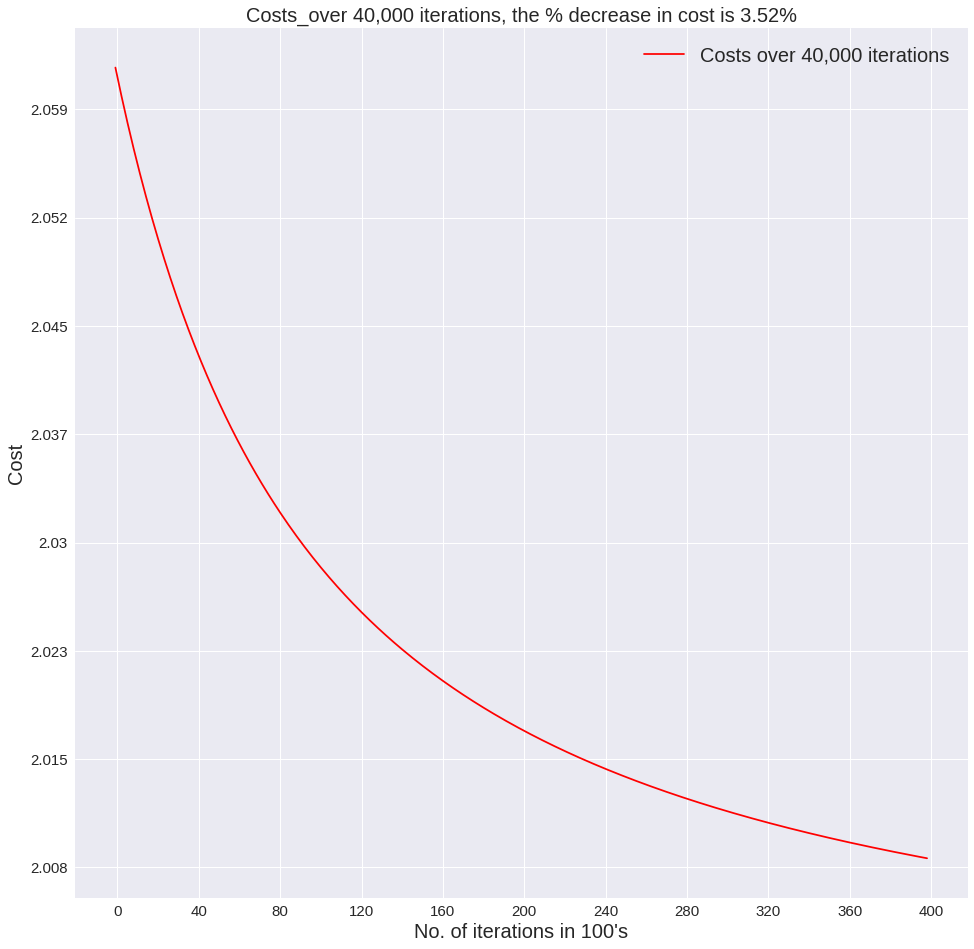

In [73]:
fig, ax = plt.subplots(figsize = (16, 16))
ax.plot(costs, color = "red", label = "Costs over 40,000 iterations")
ax.set_title("Costs_over 40,000 iterations, the % decrease in cost is " + str(np.round((costs[0] - costs[-1])/costs[0] * 100, 2)) + "%", fontsize = 20)
ax.set_xticks(np.arange(1, 440, 40))
ax.set_xticklabels(np.arange(0, 440, 40), fontsize = 15)
ax.set_yticklabels(np.round(np.arange(costs[-1], costs[0], np.ptp(costs)/10), 3), fontsize = 15)
ax.set_xlabel("No. of iterations in 100's", fontsize = 20)
ax.set_ylabel("Cost", fontsize = 20)
ax.legend(fontsize = 20);

In [71]:
# Rate of change of cost :-
dcosts = []
for i in range(0, len(costs) - 1):
    dcosts.append(costs[i] - costs[i+1])

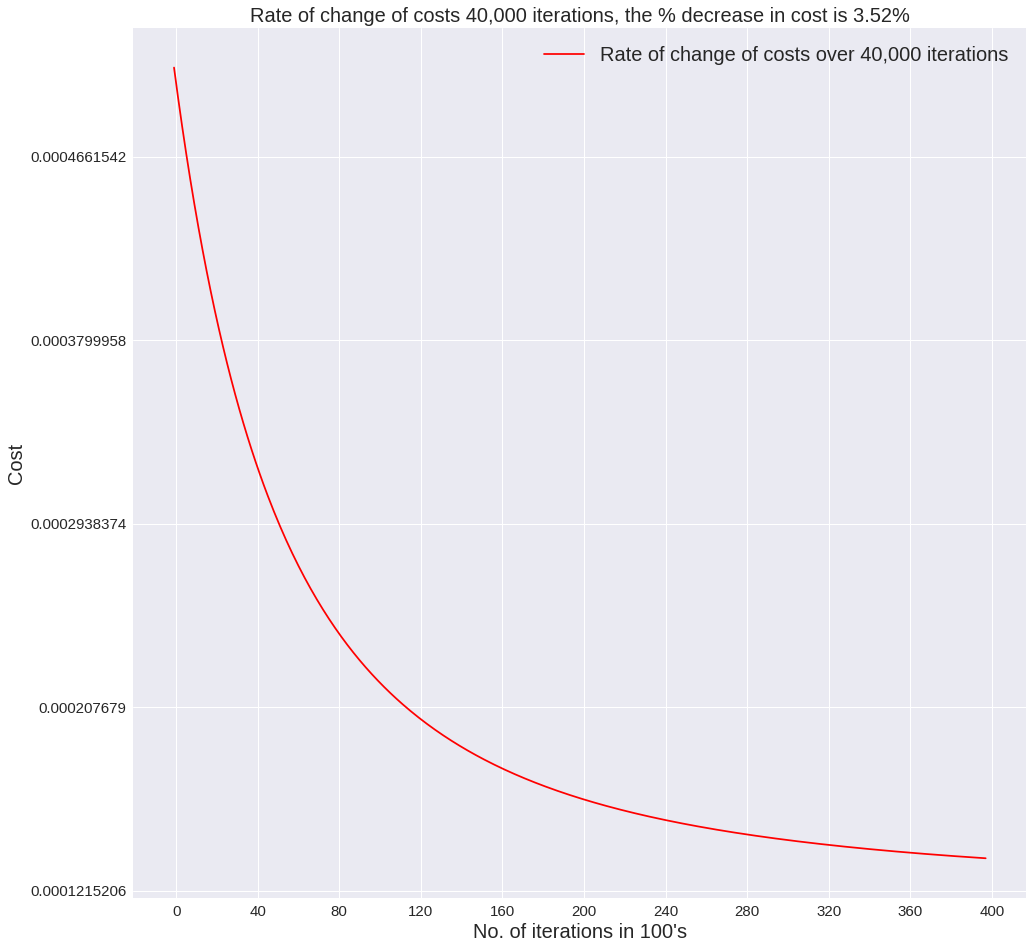

In [75]:
fig, ax = plt.subplots(figsize = (16, 16))
ax.plot(dcosts, color = "red", label = "Rate of change of costs over 40,000 iterations")
ax.set_title("Rate of change of costs 40,000 iterations, the % decrease in cost is " + str(np.round((costs[0] - costs[-1])/costs[0] * 100, 2)) + "%", fontsize = 20)
ax.set_xticks(np.arange(1, 440, 40))
ax.set_xticklabels(np.arange(0, 440, 40), fontsize = 15)
ax.set_yticklabels(np.round(np.arange(dcosts[-1], dcosts[0], np.ptp(dcosts)/10), 10), fontsize = 15)
ax.set_xlabel("No. of iterations in 100's", fontsize = 20)
ax.set_ylabel("Cost", fontsize = 20)
ax.legend(fontsize = 20);

Summary :-
1. After a basic model over 40,000 iterations we are able to decrease the cost by 3.52%.
2. This model had 3 hidden layers, with 16 nodes in all the 3 hidden layers
3. We had applied ReLu activations for the input and 2 hidden layers and Softmax activation on the last hidden layer